**Title: What Drives Ratings? Exploring the Impact of Selling Price**

**TASK - 2: Problem Statement**
The primary business question for this analysis is: What can mobile phone retailers do in regard to sales promotion, stock, price and discount techniques to achieve the highest levels of sales and customer satisfaction?

**TASK - 3: Data Pre-Processing**

In [5]:
import pandas as pd  # For handling data
import numpy as np   # For numerical operations (optional but helpful)

# Load the dataset
df = pd.read_csv('Sales.csv')

# View the first few rows to ensure the data is loaded properly
print("First 5 Rows of the Data:")
print(df.head())


First 5 Rows of the Data:
    Brands        Models         Colors Memory Storage Camera  Rating  \
0  SAMSUNG  GALAXY M31S    Mirage Black   8 GB  128 GB    Yes     4.3   
1    Nokia           3.2          Steel   2 GB   16 GB    Yes     3.8   
2   realme           C2   Diamond Black   2 GB     NaN    Yes     4.4   
3  Infinix        Note 5       Ice Blue   4 GB   64 GB    Yes     4.2   
4    Apple    iPhone 11           Black    4GB   64 GB    Yes     4.6   

   Selling Price  Original Price                Mobile  Discount  \
0          19330           20999  SAMSUNG GALAXY M31S       1669   
1          10199           10199             Nokia 3.2         0   
2           6999            7999            realme C2       1000   
3          12999           12999        Infinix Note 5         0   
4          49900           49900      Apple iPhone 11          0   

   discount percentage  
0             7.947998  
1             0.000000  
2            12.501563  
3             0.000000  
4

In [7]:
# Basic information about the dataset
print("Data Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB
None

Summary Statistics:
            Rating  Selling Price  Original Price      Discount  \
count  2970.000000    311

In [9]:
# Drop rows with missing values and create a copy
df_cleaned = df.dropna().copy()

# Modify the 'Storage' column
df_cleaned['Storage'] = df_cleaned['Storage'].fillna(0)

# Verify results
print("\nAfter Dropping Rows with Missing Values:")
print(df_cleaned.isnull().sum())
df_cleaned.head(10)



After Dropping Rows with Missing Values:
Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64


,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000
7,Apple,iPhone XR,Coral,3 GB,64 GB,Yes,4.6,42999,47900,Apple iPhone XR,4901,10.231733
8,SAMSUNG,Galaxy E5,Brown,1.5 GB,16 GB,Yes,4.2,20400,20400,SAMSUNG Galaxy E5,0,0.000000
9,Xiaomi,Redmi Note 11T 5G,Aquamarine Blue,8 GB,128 GB,Yes,4.3,21736,22999,Xiaomi Redmi Note 11T 5G,1263,5.491543
10,SAMSUNG,Galaxy A12,Black,4 GB,64 GB,Yes,4.2,11989,11989,SAMSUNG Galaxy A12,0,0.000000
11,Apple,iPhone 11,Red,4GB,256 GB,Yes,4.6,64900,64900,Apple iPhone 11,0,0.000000


In [11]:

# Remove 'GB' from the 'Memory' column
df_cleaned['Memory'] = df_cleaned['Memory'].astype(str).str.replace('GB', '', regex=False).str.strip()
df_cleaned['Memory'] = df_cleaned['Memory'].astype(str).str.replace('MB', '', regex=False).str.strip()
df_cleaned['Storage'] = df_cleaned['Storage'].astype(str).str.replace('GB', '', regex=False).str.strip()
df_cleaned['Storage'] = df_cleaned['Storage'].astype(str).str.replace('MB', '', regex=False).str.strip()

df_cleaned['Memory'] = df_cleaned['Memory'].astype(str) + ' GB'
df_cleaned['Storage'] = df_cleaned['Storage'].astype(str) + ' GB'
# View the updated DataFrame
print("Updated DataFrame:")
df_cleaned.head(10)
# Save the updated DataFrame back to CSV (optional)
#df.to_csv('Sales_updated.csv', index=False)


Updated DataFrame:


,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4 GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8 GB,16 GB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000
7,Apple,iPhone XR,Coral,3 GB,64 GB,Yes,4.6,42999,47900,Apple iPhone XR,4901,10.231733
8,SAMSUNG,Galaxy E5,Brown,1.5 GB,16 GB,Yes,4.2,20400,20400,SAMSUNG Galaxy E5,0,0.000000
9,Xiaomi,Redmi Note 11T 5G,Aquamarine Blue,8 GB,128 GB,Yes,4.3,21736,22999,Xiaomi Redmi Note 11T 5G,1263,5.491543
10,SAMSUNG,Galaxy A12,Black,4 GB,64 GB,Yes,4.2,11989,11989,SAMSUNG Galaxy A12,0,0.000000
11,Apple,iPhone 11,Red,4 GB,256 GB,Yes,4.6,64900,64900,Apple iPhone 11,0,0.000000


In [13]:
# Example: Detecting Outliers using Z-score (for numerical columns)
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df_cleaned.select_dtypes(include=[np.number])))

# Define a threshold for Z-score (e.g., 3)
threshold = 3

# Keep rows where all Z-scores are below the threshold
df_no_outliers = df_cleaned[(z_scores < threshold).all(axis=1)]

print("\nData After Removing Outliers:")
print(df_no_outliers.describe())
df_no_outliers


Data After Removing Outliers:
            Rating  Selling Price  Original Price      Discount  \
count  2689.000000    2689.000000     2689.000000   2689.000000   
mean      4.240907   21056.166233    22202.542953   1146.376720   
std       0.236668   17919.510576    18463.864572   2176.218472   
min       3.500000    1000.000000     1000.000000      0.000000   
25%       4.100000    9989.000000     9999.000000      0.000000   
50%       4.300000   14999.000000    15990.000000      0.000000   
75%       4.400000   24999.000000    26758.000000   1700.000000   
max       5.000000  103000.000000   103000.000000  16000.000000   

       discount percentage  
count          2689.000000  
mean              5.015996  
std               8.214336  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               9.091185  
max              40.013338  


,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4 GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8 GB,16 GB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512 GB,4 GB,Yes,4.0,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000
3108,SAMSUNG,Metro 313,Black,4 GB,2 GB,Yes,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000


In [16]:
# Here I am dropping some redundant columns after cleaning the data.

cleaned_df=df_no_outliers.drop(['Camera','Mobile'], axis=1)
cleaned_df.head()

,Brands,Models,Colors,Memory,Storage,Rating,Selling Price,Original Price,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,4.3,19330,20999,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,3.8,10199,10199,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,4.2,12999,12999,0,0.000000
4,Apple,iPhone 11,Black,4 GB,64 GB,4.6,49900,49900,0,0.000000
5,GIONEE,L800,Black,8 GB,16 GB,4.0,2199,2199,0,0.000000


In [18]:
# Rename columns for clarity.
cleaned_df.rename(columns={'Selling Price': 'Selling Price(INR)'}, inplace=True)
cleaned_df.rename(columns={'Original Price': 'Original Price(INR)'}, inplace=True)
cleaned_df.rename(columns={'discount percentage': 'Discount(%)'}, inplace=True)
print("\nRenamed Columns:")
print(cleaned_df.columns)
cleaned_df.head()


Renamed Columns:
Index(['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Rating',
       'Selling Price(INR)', 'Original Price(INR)', 'Discount', 'Discount(%)'],
      dtype='object')


,Brands,Models,Colors,Memory,Storage,Rating,Selling Price(INR),Original Price(INR),Discount,Discount(%)
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,4.3,19330,20999,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,3.8,10199,10199,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,4.2,12999,12999,0,0.000000
4,Apple,iPhone 11,Black,4 GB,64 GB,4.6,49900,49900,0,0.000000
5,GIONEE,L800,Black,8 GB,16 GB,4.0,2199,2199,0,0.000000


In [20]:
# Save the cleaned data to a new file
cleaned_df.to_csv('cleaned_sales_data.csv', index=False)

print("\nCleaned data saved successfully!")



Cleaned data saved successfully!


**Task- 4: Exploratory Data Analysis**

In [22]:
# Load cleaned dataset

df = pd.read_csv('cleaned_sales_data.csv')

# Preview the data
print("First 5 Rows of the Cleaned Data:")
print(df.head())

# Basic structure of the data
print("\nShape of the DataFrame:", df.shape)


First 5 Rows of the Cleaned Data:
    Brands        Models        Colors Memory Storage  Rating  \
0  SAMSUNG  GALAXY M31S   Mirage Black   8 GB  128 GB     4.3   
1    Nokia           3.2         Steel   2 GB   16 GB     3.8   
2  Infinix        Note 5      Ice Blue   4 GB   64 GB     4.2   
3    Apple    iPhone 11          Black   4 GB   64 GB     4.6   
4   GIONEE          L800         Black   8 GB   16 GB     4.0   

   Selling Price(INR)  Original Price(INR)  Discount  Discount(%)  
0               19330                20999      1669     7.947998  
1               10199                10199         0     0.000000  
2               12999                12999         0     0.000000  
3               49900                49900         0     0.000000  
4                2199                 2199         0     0.000000  

Shape of the DataFrame: (2689, 10)


In [26]:
# Method 1: Descriptive Statistics:
#  This will get a statistical summary of numerical columns.

# Descriptive statistics for numerical columns
ds = df.describe()
ds

,Rating,Selling Price(INR),Original Price(INR),Discount,Discount(%)
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,4.240907,21056.166233,22202.542953,1146.376720,5.015996
std,0.236668,17919.510576,18463.864572,2176.218472,8.214336
min,3.500000,1000.000000,1000.000000,0.000000,0.000000
25%,4.100000,9989.000000,9999.000000,0.000000,0.000000
50%,4.300000,14999.000000,15990.000000,0.000000,0.000000
75%,4.400000,24999.000000,26758.000000,1700.000000,9.091185
max,5.000000,103000.000000,103000.000000,16000.000000,40.013338


In [28]:
# Method 2: Value Counts for Categorical Columns
# You can see the distribution of values in a categorical column by using this method.

# Replace 'SomeCategoricalColumn' with an actual column name from your dataset
value_counts = cleaned_df['Rating'].value_counts()
value_counts


Rating
4.3    656
4.4    484
4.2    314
4.5    302
4.1    238
4.0    202
4.6    132
3.9    132
3.8    106
3.7     58
3.6     32
3.5     17
5.0      7
4.7      6
4.8      2
4.9      1
Name: count, dtype: int64

In [30]:
# Method 3: GroupBy Analysis
# This performs group data by a specific column and calculate summary statistics.

# Step 1: Ensure 'Age' column is numeric (if it's not, convert it)
cleaned_df['Rating'] = pd.to_numeric(cleaned_df['Rating'], errors='coerce')

# Step 2: Select only numeric columns
numeric_df = cleaned_df.select_dtypes(include=['number'])

# Step 3: Group by 'Age' and calculate mean for numeric columns
grouped_data = numeric_df.groupby('Rating').mean()

# Step 4: Display the grouped data
grouped_data

,Selling Price(INR),Original Price(INR),Discount,Discount(%)
Rating,,,,
3.5,8360.470588,8360.470588,0.000000,0.000000
3.6,9475.468750,9529.875000,54.406250,0.622497
3.7,10551.068966,10734.189655,183.120690,1.622846
3.8,9511.896226,9786.216981,274.320755,2.629406
3.9,13256.053030,13654.795455,398.742424,2.640446
4.0,14561.742574,15268.836634,707.094059,2.576528
4.1,13332.218487,13852.760504,520.542017,3.694696
4.2,14063.525478,14903.140127,839.614650,4.351995
4.3,19053.868902,20673.664634,1619.795732,7.014982


In [34]:
# Method 4: Correlation Matrix
# This method calculates and visualize correlations between numerical columns.


# Step 1: Ensure no leading/trailing spaces in column names
cleaned_df.columns = cleaned_df.columns.str.strip()

# Step 2: Select numerical columns
numerical_df = cleaned_df.select_dtypes(include=['number'])

# Step 3: Add 'Age' column if it's missing (ensure it's numeric)
if 'Rating' in cleaned_df.columns and 'Rating' not in numerical_df.columns:
    numerical_df['Rating'] = pd.to_numeric(cleaned_df['Rating'], errors='coerce')

# Step 4: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 5: Display the correlation matrix
correlation_matrix

,Rating,Selling Price(INR),Original Price(INR),Discount,Discount(%)
Rating,1.000000,0.479777,0.488607,0.194921,0.144555
Selling Price(INR),0.479777,1.000000,0.993291,0.193215,-0.074849
Original Price(INR),0.488607,0.993291,1.000000,0.305382,0.021567
Discount,0.194921,0.193215,0.305382,1.000000,0.799306
Discount(%),0.144555,-0.074849,0.021567,0.799306,1.000000


In [36]:
# Method 5: Missing Values Visualization
# It visualizes missing data patterns using Python.

# Check for missing values as percentages
missing_percentage = cleaned_df.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_percentage)

Percentage of missing values in each column:
 Brands                 0.0
Models                 0.0
Colors                 0.0
Memory                 0.0
Storage                0.0
Rating                 0.0
Selling Price(INR)     0.0
Original Price(INR)    0.0
Discount               0.0
Discount(%)            0.0
dtype: float64


**Task - 5: Data Visualization**

In [38]:
# Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

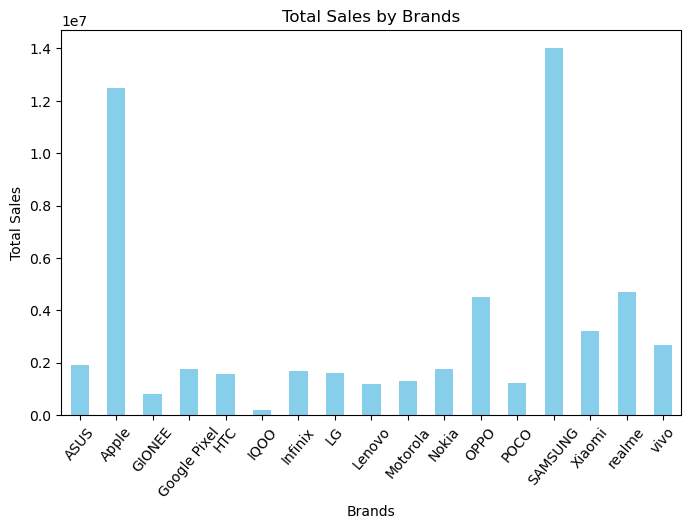

In [86]:
# Group by 'Brands' and calculate total sales
category_sales = df.groupby('Brands')['Selling Price(INR)'].sum()

# Create a bar chart
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Brands")
plt.xlabel("Brands")
plt.ylabel("Total Sales")
plt.xticks(rotation=50)
plt.show()

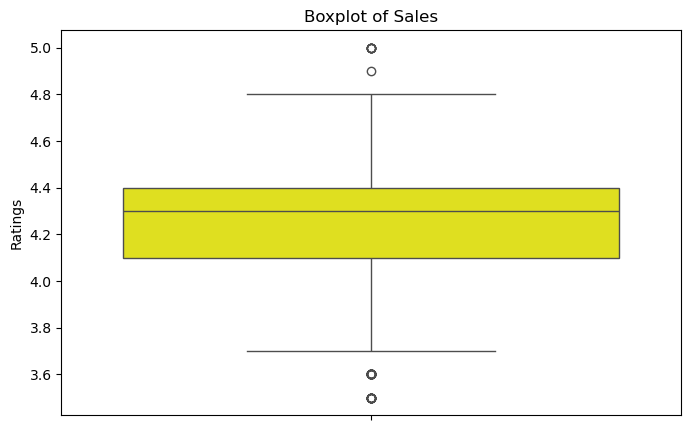

In [92]:
# Boxplot for 'Sales'
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Rating'], color='yellow')
plt.title("Boxplot of Sales")
plt.ylabel("Ratings")
plt.show()


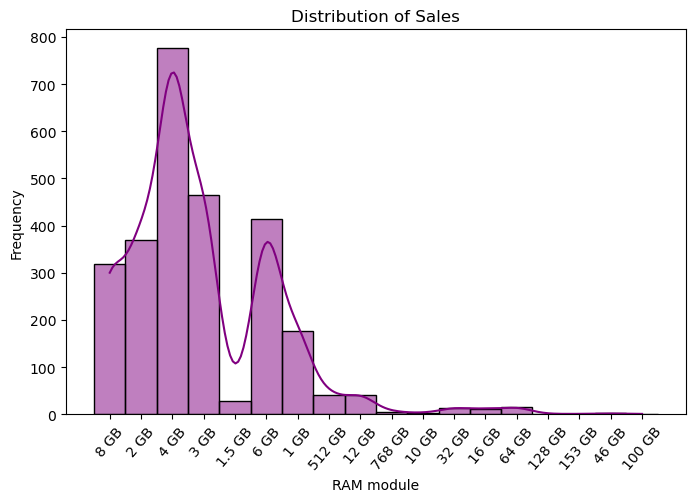

In [104]:
# Plot the distribution of sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Memory'], bins=20, kde=True, color='purple')
plt.title("Utilization of RAM")
plt.xlabel("RAM module")
plt.ylabel("Frequency")
plt.xticks(rotation=50)
plt.show()

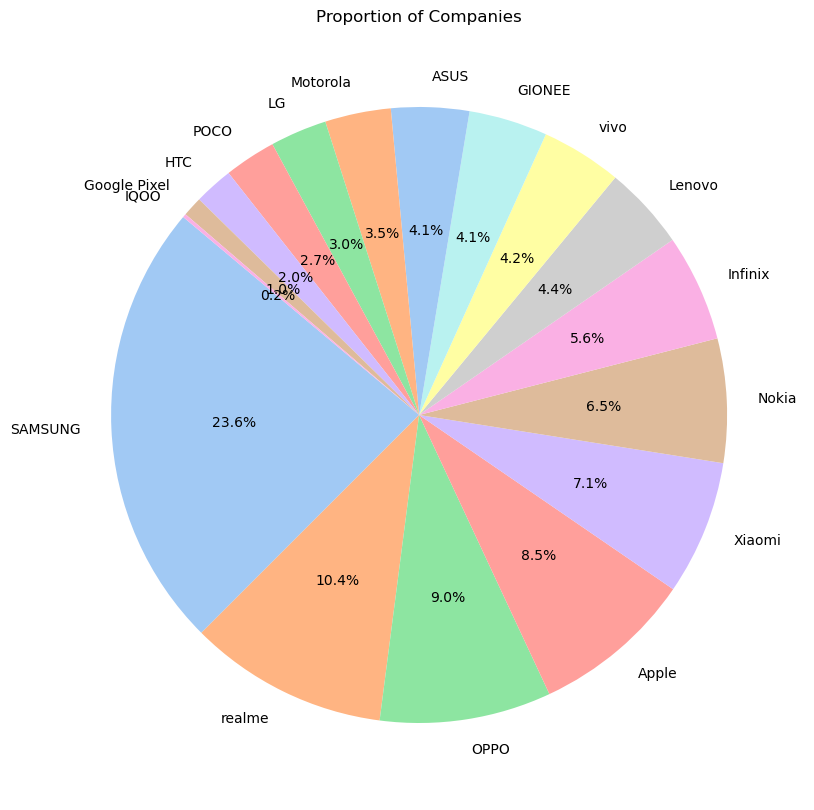

In [152]:
# Calculate the proportion of each category
category_counts = df['Brands'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Proportion of Companies")
plt.show()


**Task - 6: Predictive Model**

In [110]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [114]:
# Load the cleaned dataset
file_path = 'cleaned_sales_data.csv'  # Replace with your actual file name
df = pd.read_csv('cleaned_sales_data.csv')

# Preview the first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Brands,Models,Colors,Memory,Storage,Rating,Selling Price(INR),Original Price(INR),Discount,Discount(%)
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,4.3,19330,20999,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,3.8,10199,10199,0,0.000000
2,Infinix,Note 5,Ice Blue,4 GB,64 GB,4.2,12999,12999,0,0.000000
3,Apple,iPhone 11,Black,4 GB,64 GB,4.6,49900,49900,0,0.000000
4,GIONEE,L800,Black,8 GB,16 GB,4.0,2199,2199,0,0.000000


In [138]:
# Define the feature (X) and target variable (y)
X = df[['Selling Price(INR)']]  # Feature(s) - can be a single column or multiple columns
y = df['Rating']  # Target variable


In [140]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of each dataset
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)


Training Set Size: (2151, 1)
Test Set Size: (538, 1)


In [142]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient for Sales:", model.coef_[0])


Intercept: 4.104581283582006
Coefficient for Sales: 6.373571774422002e-06


In [122]:
# Predict Revenue for the test set
y_pred = model.predict(X_test)

# Compare actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Comparison of Actual vs Predicted Revenue:")
print(results.head())


Comparison of Actual vs Predicted Revenue:
      Actual  Predicted
1340     4.3   4.203308
2217     3.7   4.149190
368      4.4   4.359460
535      4.4   4.161937
2584     4.3   4.576219


In [144]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.04
R-squared: 0.21


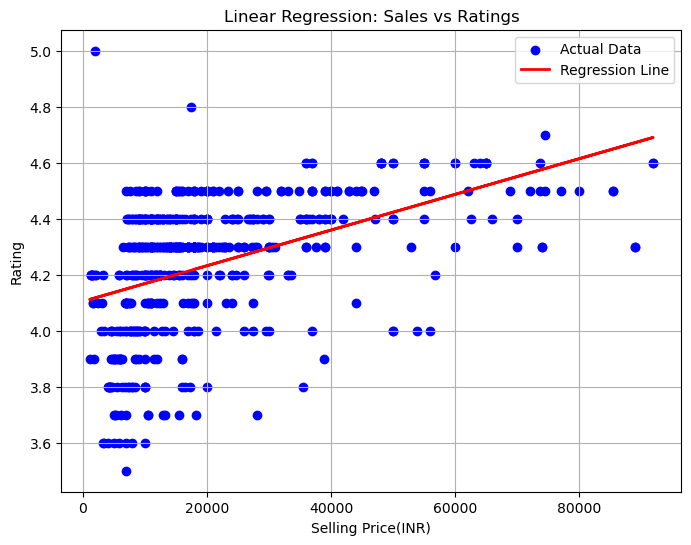

In [150]:
# Visualize the regression line with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')  # Regression line
plt.title("Linear Regression: Sales vs Ratings")
plt.xlabel("Selling Price(INR)")
plt.ylabel("Rating")
plt.legend()
plt.grid(True)
plt.show()
